<img src='../Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Optional: to ignore warnings
import warnings
warnings.filterwarnings('ignore')


## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [13]:
# Load the dataset
dataset = pd.read_csv('Mall_customers.csv')  # Adjust path if needed

# Inspect the first few rows
print(dataset.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**Check the head of ad_data**

In [19]:
print(dataset.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


** Use info and describe() on ad_data**

In [21]:
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [23]:
# Afficher les statistiques de base pour les colonnes numériques
print("Basic statistics of the dataset:")
print(dataset.describe())

# Afficher les statistiques pour **toutes les colonnes**, y compris catégorielles
print("\nStatistics including categorical columns:")
print(dataset.describe(include='all'))

# Vérifier les valeurs manquantes
print("\nMissing values in each column:")
print(dataset.isnull().sum())

# Afficher le type de chaque colonne
print("\nColumn data types:")
print(dataset.dtypes)

# Afficher les dimensions du dataset
print("\nDataset shape (rows, columns):")
print(dataset.shape)


Basic statistics of the dataset:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Statistics including categorical columns:
        CustomerID  Gender         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq      

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

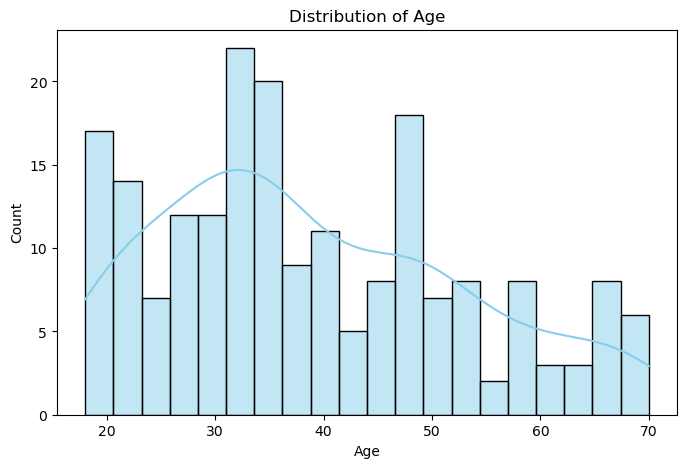

In [25]:
# Histogram of Age
plt.figure(figsize=(8,5))
sns.histplot(dataset['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Create a jointplot showing Area Income versus Age.**

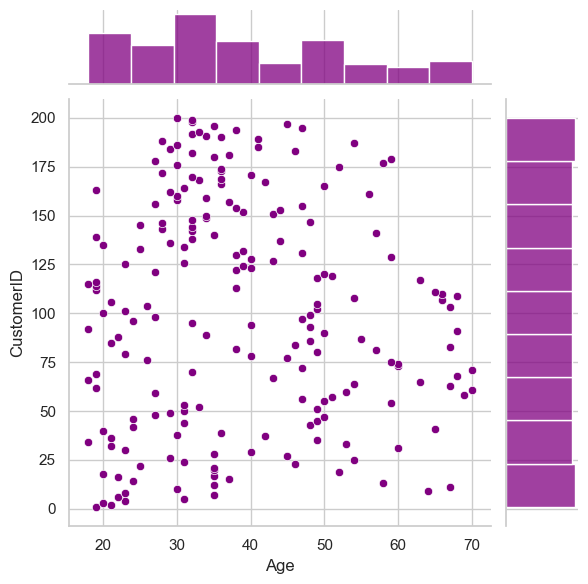

In [47]:
# Jointplot of Area Income vs Age
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # style optionnel

# Créer le jointplot
sns.jointplot(
    data=dataset,
    x='Age',
    y=dataset['CustomerID'],    # <-- corriger ici
    kind='scatter',     # scatter, hex, kde, reg
    color='purple'
)
plt.show()


**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

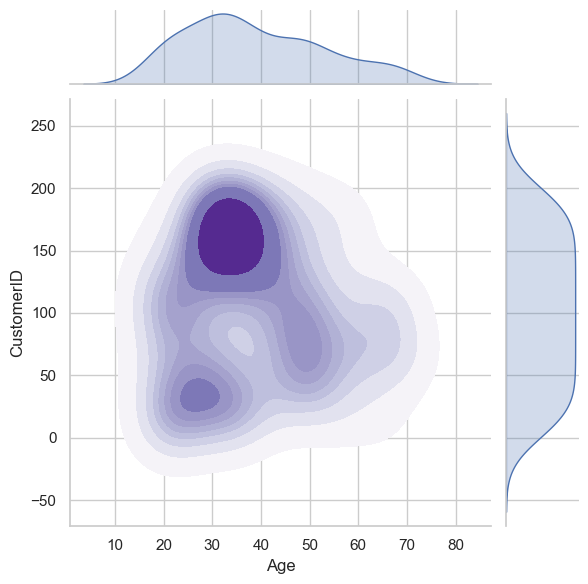

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # style optionnel

# Jointplot KDE of Daily Time Spent on Site vs Age
sns.jointplot(
    data=dataset,
    x='Age',
    y=dataset['CustomerID'],
    kind='kde',        # joint KDE plot
    fill=True,         # remplissage de la densité
    cmap='Purples'     # couleur du contour
)

plt.show()


** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

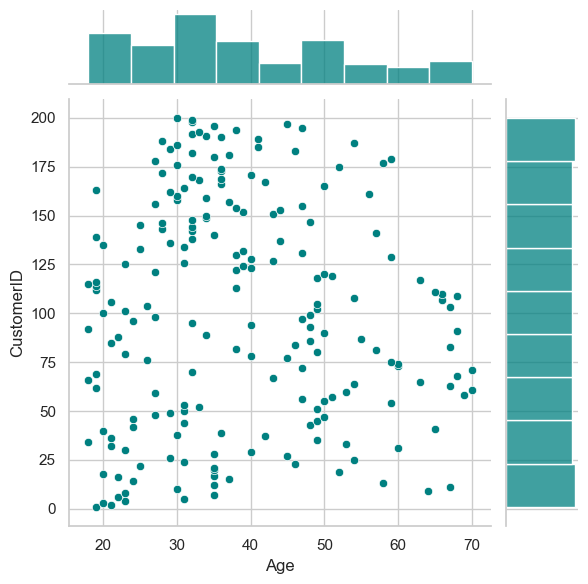

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # style optionnel

# Jointplot of Daily Time Spent on Site vs Daily Internet Usage
sns.jointplot(
    data=dataset,
    x='Age',
    y='CustomerID',
    kind='scatter',     # scatter plot
    color='teal'
)

plt.show()


** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

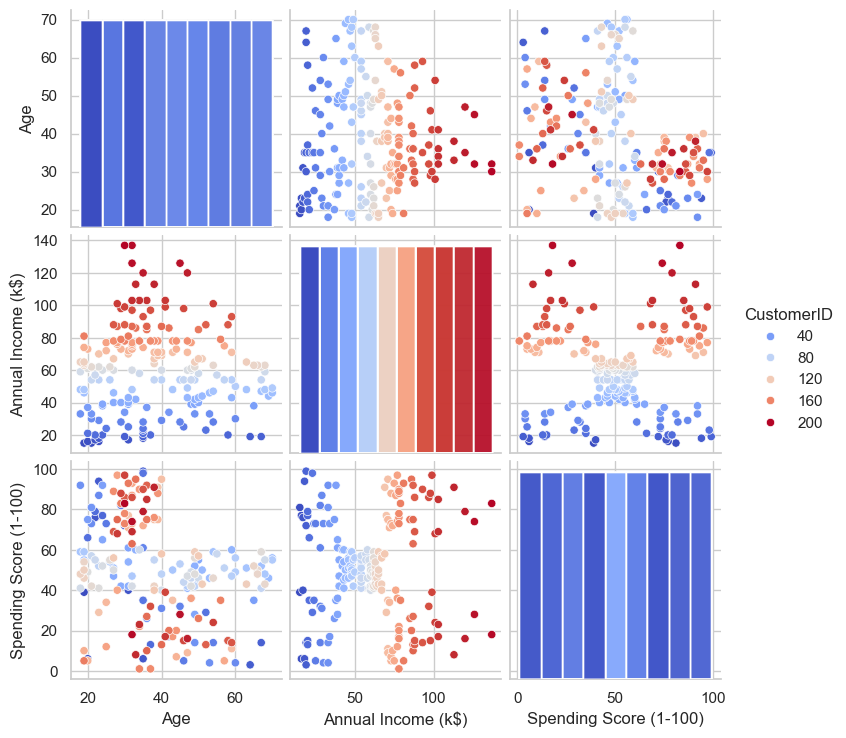

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # style optionnel

# Pairplot of the dataset with hue defined by 'Clicked on Ad'
sns.pairplot(
    data=dataset,
    hue='CustomerID',       # color points by target variable
    palette='coolwarm',        # color palette
    diag_kind='hist'           # histogram on the diagonal
)

plt.show()


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

** Train and fit a logistic regression model on the training set.**

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

** Create a classification report for the model.**

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330

